# TME2: Prise en main de PIL et Matplotlib

> Consignes: le fichier **TME2_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en **TME2_nom1_nom2.ipynb**.
<tt>PIL</tt> (https://pillow.readthedocs.io/en/stable/index.html) est le module qui nous permet de lire, manipuler et écrire des images avec un grand nombre de formats possible. <tt>Matplotlib</tt> permet d'afficher des courbes et des images, il est chargé par l'intermédiaire du meta-module <tt>pylab</tt>. Les deux modules sont importés par la série d'instructions Python suivante:

In [24]:
from PIL import Image
from pylab import *

## Exercice 1 : chargement d'image et visualisation
### 1.1 Voir une image
Écrire un code Python qui charge l'image <tt>img/genies-math.jpg</tt> et l'affiche à l'aide de la commande imshow(). Afficher le mode de cette image.

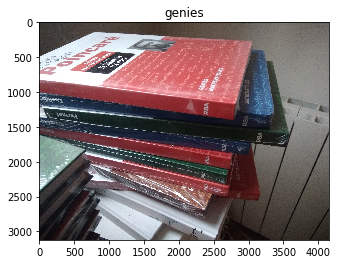

In [4]:
from PIL import Image
from pylab import *

genies=Image.open('img/genies-math.jpg')
title('genies')
imshow(genies)
show()

### 1.2 Conversion de mode
Convertir cette image en image à niveau de gris. Afficher simultanément les deux images couleurs et niveaux de gris,  l'une à droite, l'autre à gauche, sans les axes. Donner un titre à chaque image.

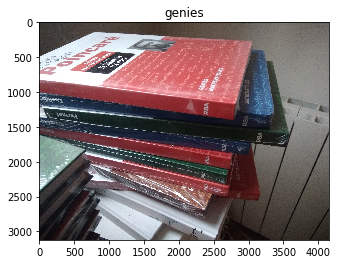

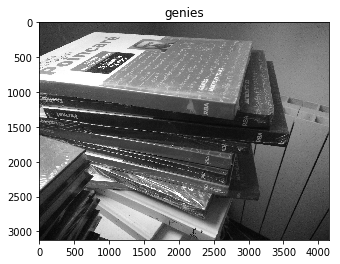

In [79]:
from PIL import Image
from pylab import *

img=Image.open('img/genies-math.jpg')
title('genies')
imshow(img)
show()
img=img.convert('L')
(w,h)=img.size
title('genies')
imshow(img)
show()

### 1.3 Histogramme
Utiliser la méthode <tt>histogram()</tt> de la classe <tt>Image</tt> pour calculer l'histogramme de l'image en niveau de gris calculée à la question précédente. Afficher l'histogramme sous la forme d'un graphe de bar.

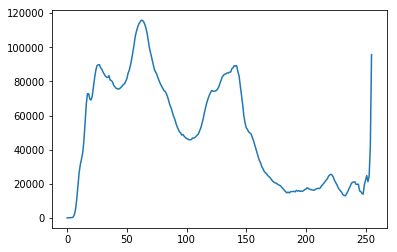

In [78]:
from pylab import *
from PIL import Image

img=Image.open('img/genies-math.jpg')
img=img.convert('L')
(w,h)=img.size
his=img.histogram()
plot(his)
show()


### 1.4 Égalisation d'histogramme
Utiliser les fonctions <tt>egalisation()</tt> et <tt>applique()</tt> du TME1 pour créer une liste de nouvelle valeurs dont l'histogramme a été égaliser. Puis en faire une nouvelle image PIL. Afficher l'image avant, puis après égalisation. Afficher l'histogramme de l'image égalisée.

### 1.5 Egalisation d'histogramme (suite)
La classe <tt>ImageOps</tt> du module <tt>PIL</tt> contient une méthode <tt>equalize()</tt> qui égalise l'histogramme d'une image. Utiliser cette méthode et comparer le résultat avec votre propre fonction d'égalisation (comparer aussi les deux histogrammes après égalisation).

## Exercice 2 : parcours d'image et calcul de statistiques
### 2.1 Calcul des extrema de l'image par parcours
Écrire une fonction <tt>extrema()</tt> qui prend une image PIL, la parcours pixel par pixel, à l'aide de classe <tt>PyAcess</tt> (ou une des autres méthodes vues en cours) et retourne ses valeurs minimale et maximale.


In [85]:
from pylab import *
from PIL import Image
def extrema():
    img=Image.open('img/genies-math.jpg')
    img=img.convert('L')
    (w,h)=img.size
    min=img.getpixel((0,0))
    max=img.getpixel((0,0))
    for y in range(h):
        for x in range (w):
            if min>img.getpixel((x,y)):
                min=img.getpixel((x,y))
            if max<img.getpixel((x,y)):
                max=img.getpixel((x,y))
    print("le min est ",min)
    print("le max est", max)
extrema()
            

le min est  0
le max est 255


### 2.2 Application et temps de calcul
Appliquer la fonction <tt>extrema()</tt> à l'image <tt>img/genies-math.jpg</tt>, convertie en niveau de gris. Comparer le temps d'exécution avec la méthode <tt>getextrema()</tt> de la classe Image. Pour comparer les temps d'exécution, on peut utiliser les deux fonctions <tt>tic()</tt> et <tt>tac()</tt>: la première démarre un chronomètre, la seconde affiche le temps écoulés depuis le dernier appel de l'un des deux fonctions. Quelle est la taille de cette image ? Comment expliquer ces différences de temps d'exécution ?

In [86]:
from pylab import *
from PIL import Image
from time import process_time
mytime = 0

def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()
print ("tech 1")
tic()
extrema()
tac()
print ("tech 2")
tic()
img=Image.open('img/genies-math.jpg')
img=img.convert('L')
img.getextrema()
tac()


tech 1
le min est  0
le max est 255
19.171875
tech 2
0.109375


## Exercice 3: sur la couleur
### 3.1 séparation de canaux
Écrire un code Python qui charge l'image <tt>mandrill.png</tt>. Vérifier, à l'aide d'un test de son mode est bien <tt>RGB</tt>.
Séparer les 3 canaux à l'aide de la méthode <tt>split()</tt> de la classe <tt>Image</tt>. On peut aussi, de façon alternative, utiliser la méthode <tt>getchannel()</tt>

In [99]:
from pylab import *
from PIL import Image

img=Image.open('img/genies-math.jpg')
if(img.mode == 'RGB'):
    
    print("bon mode")
    r,g,b=img.split()

bon mode


### 3.2 échange de canaux
Créer une nouvelle image <tt>RGB</tt> dans laquelle on a échanger les canaux rouge et bleu. Afficher cette nouvelle image. On pourrat utilise la méthode <tt>merge()</tt> de la classe <tt>Image</tt>. Visualiser la nouvelle image. Essayer différente combinaison de canaux.

bon mode


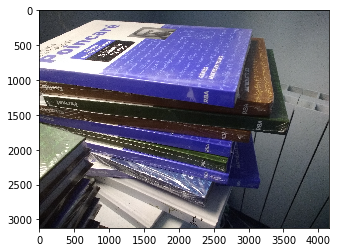

In [125]:
from pylab import *
from PIL import Image

img=Image.open('img/genies-math.jpg')
if(img.mode == 'RGB'):
    print("bon mode")
    r,g,b=img.split()
    img=Image.merge('RGB',(b,g,r))
imshow(img)
show()

### 3.3 Canaux séparés dans leur couleur
Écrire un code Python qui créée une image montrant le canal rouge en niveau de rouge. 
Faire de même pour les deux autres canaux.

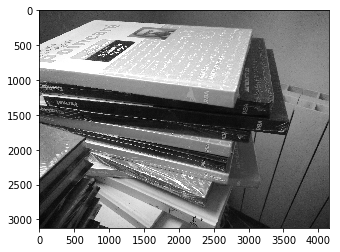

In [132]:
from pylab import *
from PIL import Image

img=Image.open('img/genies-math.jpg')
img=img.getchannel(0)
imshow(img)
show()

## Exercice 4: avec image codée sur deux octets et ou virgule flottante
### 4.1 Image codée sur 2 octets
Charger l'image <tt>img/CT-scan.png</tt> et afficher les extremas de cette image. Cette image est issue d'une acquisition IRM, chaque valeur . Afficher l'image telle quelle et commenter. Quel opération faut-il faire pour voir tous les détails? Réaliser cette opération et afficher l'image transformée.

I


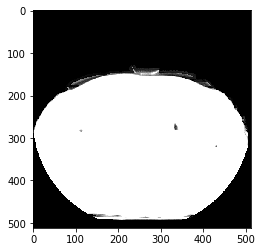

In [135]:
from pylab import *
from PIL import Image

img=Image.open('img/CT-scan.png')
print(img.mode)
img.getextrema()
imshow(img)
show()

### 4.2 Image codée en virgule flottante

Même question avec l'image <tt>img/sst.tig</tt> qui est codée en virgule flottante et réprésente une image satellite de température de surface de l'Océan Atlantique. Afficher son mode.


In [136]:
from pylab import *
from PIL import Image

img=Image.open('img/sst.tig')
print(img.mode)
img.getextrema()
imshow(img)
show()

FileNotFoundError: [Errno 2] No such file or directory: 'img/sst.tig'